***Notebook 4: Business Insights & Recommendations***

**Introduction: Why Business Integration?**

In our previous analyses, we have explored in depth:
- 01 Customer Experience & Transaction Patterns (Exploratory Analysis)
- 02 Time Trends & Seasonal Anomalies (Time Pattern Analysis)
- 03 Product Category Sales & Profit Structure (Product & Profit Analysis)

The goal of this chapter is to perform **cross-dimensional integrated analysis** of these insights to develop concrete, actionable business optimization recommendations.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Set visualization style
sns.set_style('whitegrid')
sns.set(font_scale=1.1)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

***4.1 Month × Product Category Sales Heatmap***

**Purpose**:  
To support our final analysis, we want to analyze "sales performance of different product categories in each month" by combining the **time dimension (months)** with **product categories** to observe the "seasonality" of products.

This can help us answer:
- Which products surge in specific months? (e.g., year-end gift categories)
- Which products remain stable throughout the year?
- Which potential categories deserve increased marketing investment?

***Insights & Strategic Recommendations***

**We observe several key phenomena:**

1. **Fashion accessories** and **Home and lifestyle** categories show **significant sales surge in November and December** (exceeding 80,000+), displaying **strong seasonality**. These are ideal candidates for increased holiday marketing resources.

2. **Health and beauty** category shows low sales all year (only about 3,900 per month on average) with almost no noticeable fluctuations, indicating a lack of rhythmic marketing or targeted promotions. This category typically has potential for gifts and daily care in other retail markets. We recommend redesigning promotional activities (such as pairing with women's festivals, experience bundles, etc.).

3. **Electronic accessories**, though averaging slightly higher monthly sales than other unpopular categories (about 6,500), continue to show persistently low sales from April to October (around 2,000 in many months), indicating untapped product potential. Considering this category typically has "high unit price × high conversion rate" potential, it should be prioritized for resource optimization and repositioning.

4. In comparison, **Sports and travel**, while also low in average sales, belongs to a "non-core consumption" category with more specialized purchasing behavior. Therefore, low sales don't necessarily indicate strategic failure, and don't require immediate adjustment.

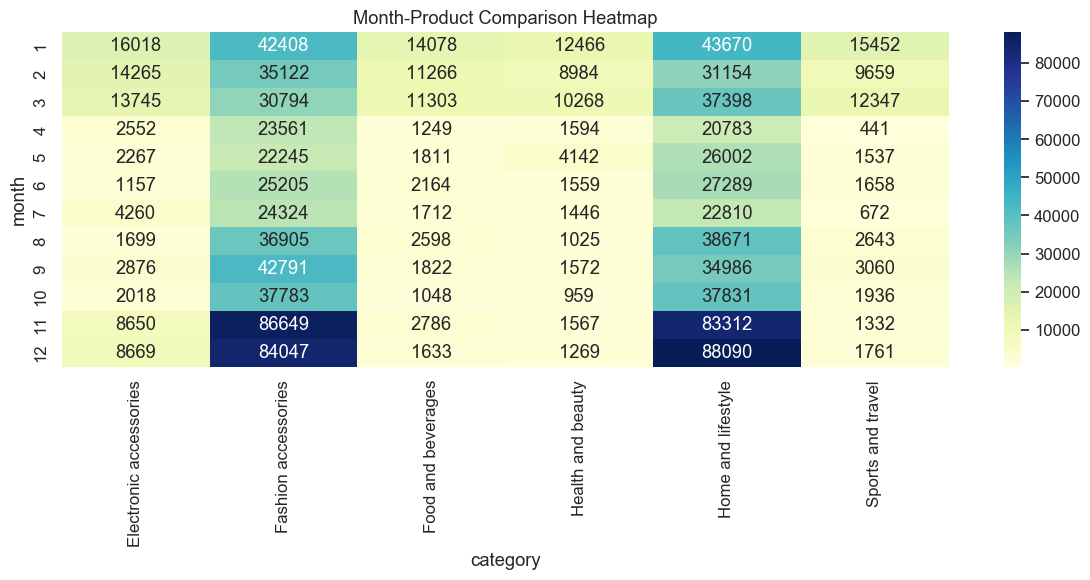

In [3]:
df = pd.read_excel("/Users/wendychu/Desktop/python/walmart ba project/my_env1/data/walmart_time.xlsx")
pivot_table = df.pivot_table(index="month", columns="category", values="total", aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(data=pivot_table, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title("Month-Product Comparison Heatmap")
plt.tight_layout()

plt.savefig("product_category_heatmap", dpi=300)

plt.show()

In [4]:
avg_sales = pivot_table.mean().sort_values()

# Calculate the difference between highest and lowest months for each category (to see if there are peaks)
range_sales = pivot_table.max() - pivot_table.min()

# Combine into a table for observation
summary = pd.DataFrame({
    'Average Sales': avg_sales,
    'Max-Min Difference': range_sales
})

summary.sort_values(by='Average Sales', inplace=True)
display(summary)

,Average Sales,Max-Min Difference
category,,
Health and beauty,3904.265000,11506.55
Sports and travel,4374.827500,15011.14
Food and beverages,4455.940000,13029.72
Electronic accessories,6514.585833,14861.24
Fashion accessories,40986.158333,64403.35
Home and lifestyle,40999.671667,67306.96


***4.2 Payment Method × Product Category Sales Analysis***
**Purpose**:  
We want to understand "which product categories are preferred by customers using different payment methods" by cross-analyzing **payment methods** with **category preferences**.

This helps us answer:
- Do cash-paying customers prefer certain types of products?
- Do e-wallet users spend less per transaction but purchase more frequently?
- Can we design marketing campaigns targeting specific payment methods (e.g., credit card bonuses, cash discounts, e-wallet rewards)?

**Insights & Strategic Recommendations**

1. **Fashion accessories** and **Home and lifestyle** are the two highest-selling categories across all payment methods, indicating they are stable revenue drivers.  
   - **Credit card users prefer these two categories most** (each exceeding 200,000), possibly due to their higher unit prices and suitability for installment payments.
   - We recommend implementing credit card installment plans, bonus point redemptions, VIP member rewards, etc., to increase conversion and loyalty.

2. **E-wallet users** have very high spending in both **Fashion accessories (195,210) and Home and lifestyle (196,009)** categories, almost on par with credit card users, showing that e-wallet users also have high-value purchasing power.  
   - This indicates this group prefers single-item checkout and quick shopping experiences.
   - We recommend designing "single-item discounts, quick purchase" promotional strategies and collaborating with e-wallet platforms to launch instant reward campaigns.

3. **Cash customers, while having lower overall spending**, still contribute steadily to Fashion and Home categories (about 95,000 each), showing that traditional cash consumption still exists in physical stores.  
   - Consider implementing cash discounts or bundle deals for physical stores to encourage offline consumption.

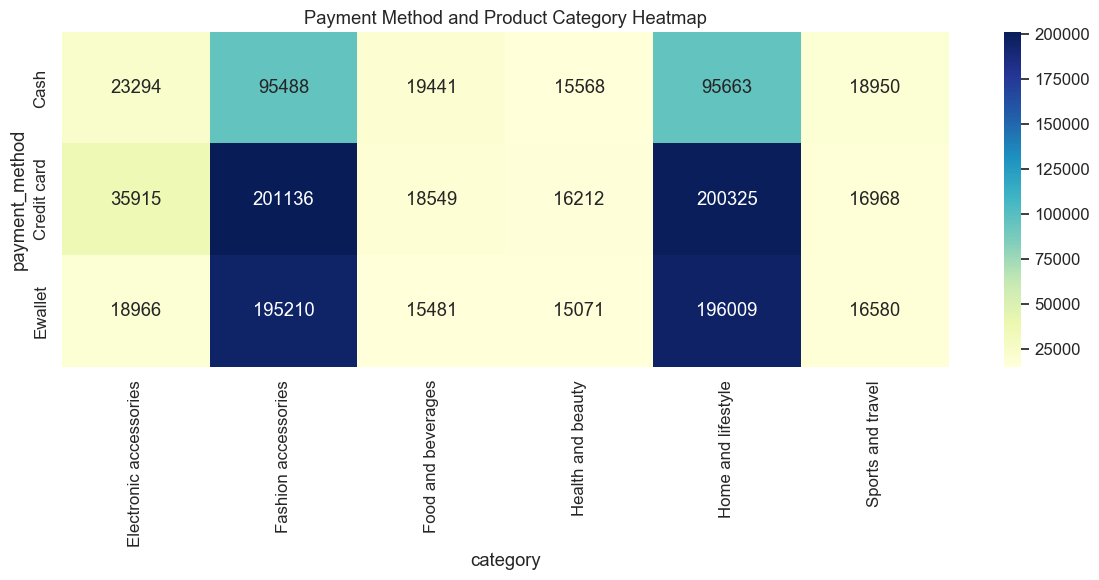

In [5]:
pivot_table_payway_cat = df.pivot_table(index="payment_method", columns="category", values="total", aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(data=pivot_table_payway_cat, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title("Payment Method and Product Category Heatmap")
plt.tight_layout()

plt.savefig("paymethod_category_heatmap", dpi=300)
plt.show()

***4.3. Statistical Testing Analysis: Average Consumption Differences Across Payment Methods***

**Purpose**: We want to understand whether customers' choice of payment method affects their average spending in the popular "Fashion accessories" category.

***Statistical Results Summary:***

- Using **ANOVA testing** to compare the average spending across three payment methods (cash, credit card, e-wallet).
- Results show: p < 0.05, indicating statistically significant differences in average spending across these three payment methods.
- Combined with the boxplot, we can observe that customers using credit cards and e-wallets have noticeably higher spending distributions.

***Statistical Insights***

***1. Scipy One-way ANOVA Test:***
- p-value = 0.0043, indicating significant differences between the three payment methods.
- Conclusion: These differences in averages are not coincidental but statistically valid.

***2. Statsmodels OLS Model + ANOVA Table:***
- Using ols() to build the model and anova_lm() to decompose sources of variation.
- Results show: payment_method explains significant variation in the model, with p-value less than 0.05.
- Conclusion: Payment method has explanatory power and predictive value for spending amounts.

In [6]:
# Extract only data for "Fashion accessories" category
fashion_pay_method = df[df["category"] == "Fashion accessories"]

# Use ANOVA analysis to check for differences
from scipy.stats import f_oneway

ewallet_fa = df[df["payment_method"] == "Ewallet"]["total"]
cash_fa = df[df["payment_method"] == "Cash"]["total"]
Creditcard_fa = df[df["payment_method"] == "Credit card"]["total"]

f_stat, p_value = f_oneway(cash_fa, Creditcard_fa, ewallet_fa)

print(f"ANOVA results: f_value= {f_stat:.2f}, p_value= {p_value:.4f}")

if p_value < 0.05:
    print("There are significant differences in average spending across the three payment methods")
else:
    print("Differences across payment methods are not significant")

ANOVA results: f_value= 43.48, p_value= 0.0000
There are significant differences in average spending across the three payment methods


In [7]:
# Import libraries for OLS analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
model = ols("total ~ C(payment_method)", data=fashion_pay_method).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA table:")
print(anova_table)

ANOVA table:
                         sum_sq      df         F    PR(>F)
C(payment_method)  7.606800e+04     2.0  5.453874  0.004308
Residual           3.180732e+07  4561.0       NaN       NaN


***4.4 Analysis Summary and Key Insights Review***

This section integrates the core insights extracted from the first three analysis notebooks (Notebooks 1-3), supported by visual charts. The purpose is to transform analytical results into clear, logical business understanding as a basis for subsequent strategy development.

For ease of understanding, this section will proceed in the following order:

1. data_exploration (Customer Behavior & Consumption Structure)
2. time_pattern_analysis (Trends & Anomalies)
3. product_profit_analysis (Category Strategy & Customer Characteristics)
4. Notebook 4 (This Chapter): Statistical Validation & Integrated Insights

Each section includes:
- Insight summary (bullet points)
- Corresponding charts
- Concluding recommendations

***4.4.1 01 data_exploration (Customer Behavior & Consumption Structure)***

This section conducts preliminary exploration of customer ratings, transaction distribution, product structure, and payment methods, extracting the following four key insights:

1. **Rating distribution shows multiple peaks, experience gaps pose potential risks**  
   - Ratings mainly cluster at 4, 5, 7, and 9 points, representing large gaps in customer experience perception, possibly indicating service inconsistency issues.
2. **Sales structure shows long-tail distribution, high-value customers are the minority**  
   - Most transactions concentrate in the low-to-medium amount range, with only a small portion of high-value transactions significantly impacting overall revenue.
3. **Product portfolio is highly concentrated, flagship products have excessive share**  
   - Fashion accessories and Home and lifestyle categories together contribute over 75% of sales, showing obvious category imbalance.
4. **Payment method influences spending amount, cash users have highest average transaction value**  
   - Although e-wallets and credit cards are used frequently, cash payment groups have higher average spending, possibly representing high loyalty or traditional shopping group preferences.
  <img src="../visualizations/chapter1-output/exploratory_analysis.png" width="480"> 

Analysis Summary Recommendations:
1. **Improve customer experience consistency:**  
   - Customer ratings show multiple peaks, mainly clustering at 4, 5, 7, and 9 points, reflecting inconsistent experiences. We recommend conducting service follow-ups and surveys with lower-rated customers, and optimizing customer service and rating mechanisms to improve customer satisfaction stability.
2. **Design differentiated strategies for high-value customers:**  
   - Sales amounts follow a long-tail distribution, showing that a small number of high-value customers contribute significantly to revenue. We recommend establishing high-spending customer identification mechanisms, launching VIP or membership systems to improve retention and repurchase rates.
3. **Re-evaluate product portfolio structure:**  
   - Fashion Accessories and Home and Lifestyle categories account for over 75% of sales, showing obvious structural imbalance. We recommend further analyzing growth potential in other categories and exploring possibilities for revenue diversification.

***4.4.2 02 time_pattern_analysis (Time Trends & Anomalies)***

1. **Sales show strong seasonality:**
  - November-December are peak sales months, with sales 2-3 times higher than mid-year lows. We recommend concentrating marketing and inventory resources toward year-end.
  <img src="../visualizations/chapter2-output/monthly_trend.png" width="500">
 
2. **Daily peaks concentrate between 14:00-19:00:**
  - Afternoon hours show high customer activity, ideal for pushing marketing messages and discount activities.

  - <img src="../visualizations/chapter2-output/hour_sale_trendency.png" width="500">

3. **Tuesday shows unusually high sales performance:**
  - Tuesday noticeably deviates from other weekday averages, possibly related to internal marketing strategies or external promotion timing (such as member days). We recommend further validation of the causes.
 <img src="../visualizations/chapter2-output/weekly_sale_trend.png" width="500">

4. **The 11th of each month is a potential promotion day:**

- Multiple months show abnormally high sales on the 11th, with 17 out of the top 20 abnormal records occurring on the 11th, indicating possible "mid-month shopping periodicity."
- We recommend checking internal activity records (such as member days, special price days), or formally planning a "mid-month fixed promotional activity day" to improve stability and expectancy.
Daily anomaly frequency distribution (horizontal axis shows dates within each month):
<img src="../visualizations/chapter2-output/outlier_point_of_sale.png" width="500">

5. **Time series decomposition reveals stable seasonal structure:**
- Time series decomposition reveals sales fluctuations primarily following a "year-end peak + mid-year plateau + stable bottom" pattern, providing a good foundation for prediction. Subsequently, predictive models can be built to optimize operational decisions.
<img src="../visualizations/chapter2-output/Time Series Analysis.png" width="500">


**Analysis Summary & Recommendations**

1. **Year-end is clearly the peak sales season**, with November-December sales far exceeding other months. We recommend early inventory preparation and planning for year-end promotional activities.
2. **Daily sales peaks concentrate between 14:00-19:00**, requiring staffing resources and logistical support during peak hours.
3. **The 11th of each month is a potential promotion day**, with abnormally high sales frequently occurring on this date. Consider designing it as a "mid-month brand activity" to attract customer attention.
4. **Tuesday sales exceed weekends**, contrary to expectations. We recommend investigating customer behavior and possible corporate purchasing patterns.

***4.4.3 product_profit_analysis (Product & Profit Analysis)***

1: **Fashion and Home are cash cow products, core sources of stable cash flow**
- These two categories account for 70% of total sales, with high average profits.
- We recommend maintaining sufficient inventory, optimizing logistics and operational efficiency to continue generating stable cash flow.

- <img src="../visualizations/chapter3-output/products_catgory_bcg.png" width="500">


2: **Food and Health, though not core products, have high-frequency potential**

- Food and beverages have low average transaction value but high average items per order (over 5 items), showing consumers prefer high-frequency, small-amount purchases. These are suitable as traffic-driving and promotional bundling items.
- Can be used as promotional traffic-generating products to attract customers, thereby driving sales of other high-profit items.

- <img src="../visualizations/chapter3-output/category_avgprice_items.png" width="500">


3: **Consumer purchasing behavior shows clear segmentation, requiring differentiated pricing**

- High-priced products (like electronics) have high transaction amounts but low ordering frequency.
- Low-priced products (like Food) have high transaction frequency but low average transaction value.
- Different consumer segments show varying purchasing patterns, suitable for tiered pricing.

- <img src="../visualizations/chapter3-output/category_sales_summary_pic.png" width="500">
- <img src="../visualizations/chapter3-output/customer_tier_distribution.png" width="500">

**Analysis Summary & Recommendations**

1. **Fashion/Home are sales leaders**, but revenue is highly dependent on single categories. We recommend increasing the proportion of non-core categories (such as Food/Health) to diversify risk.
2. **Food/Health categories have potential**: Food has high transaction frequency, Health has high ratings but low sales. These should become "potential item cultivation targets."
3. **Consumer tier behavior is distinct**: High-priced items tend toward bulk purchasing but low frequency, while low-priced items see frequent small-amount consumption. We recommend implementing tiered pricing strategies (such as high-price bundles, low-price promotional discounts).
4. **Product portfolio concentration is too high**, with just two categories accounting for over 70% of revenue. We recommend using BCG strategies to re-plan resource allocation and marketing investments.

4.4.4 **Payment Method and Consumption Analysis Summary**

The following behavioral patterns reveal potential consumer segmentation and preference differences. We recommend designing corresponding promotional and recommendation strategies for different payment methods in the future to improve customer lifetime value and conversion rates.

According to ANOVA and OLS statistical test results, different payment methods have a significant impact on spending amounts (p-value < 0.01).
- **Cash payers** are a high-value group, with significantly higher average spending than other types, possibly coming from regular customers or bulk purchases.
- **Credit card users** have stable spending levels across multiple categories, representing the brand's core customer group.
- **E-wallet users** prefer quick checkout, primarily single-item purchases, and represent younger customers. We recommend designing "mobile-guided shopping strategies" and "short-term flash sales."
 <img src="../visualizations/chapter4-output/paymethod_category_heatmap.png" width="500">
 <img src="../visualizations/chapter4-output/monthly_category_heatmap.png" width="500">

***4.5 Business Strategy Recommendations***

Based on analysis of Walmart's 2019-2024 sales data, we've extracted key insights from four dimensions: product, time, customer, and payment behavior. We propose the following short-term, medium-term, and long-term implementable strategies to help the company increase revenue, diversify risk, and strengthen customer loyalty.

---

***Strategy 1: Product Portfolio Optimization***

| Timeline | Strategy Content |
|----------|--------------------------------------------------------------------------|
| Short-term (1-3 months) | Strengthen Fashion/Home category advantages in product exposure and cross-selling (matching customer consumption tiers) |
| Medium-term (3-6 months) | Conduct small-scale promotional testing and brand partnerships for Food/Health potential categories |
| Long-term (6-12 months)| Establish product performance dashboards, regularly review category performance and reallocate resources |

**Data Basis**: Fashion/Home sales account for 75%; Food has high ratings but low sales volume, showing traffic potential.
Health has high ratings and high average transaction value.

- <img src="../visualizations/chapter3-output/category_sales_summary_pic.png" width="500">
- <img src="../visualizations/chapter3-output/category_avgprice_items.png" width="500">

---

***Strategy 2: Time-based Sales Rhythm Control***

| Timeline | Strategy Content |
|----------|--------------------------------------------------------------------------|
| Short-term (1-3 months) | Introduce an "11th Promotion Day" system to expand existing sales anomaly advantages |
| Medium-term (3-6 months) | Plan exclusive promotional periods for April-July low season (such as seasonal transition major promotions) |
| Long-term (6-12 months)| Establish time series prediction models to assist with inventory and staffing forecasts |

**Data Basis**: Monthly sales show strong seasonality, with year-end peaks several times higher than mid-year; the 11th of each month shows high sales anomaly records.
***We can observe that in 2022 and 2023, the number of anomalies increased and the anomaly multiplier also increased (seven-day average)***

 | Year | Occurrences | Total Anomaly Sales | Average Anomaly Multiple |
|------|----------|--------------|---------------|
| 2020 |    2     |     4453     |     2.19      |
| 2021 |    3     |     8991     |     2.19      |
| 2022 |    6     |    14446     |     2.21      |
| 2023 |    6     |    14435     |     2.22      |


 - <img src="../visualizations/chapter2-output/month_sale_seasonal_trend.png" width="500">

---

***Strategy 3: Customer Behavior Tiered Marketing***

| Timeline | Strategy Content |
|----------|--------------------------------------------------------------------------|
| Short-term (1-3 months) | Provide high-value packages and membership point rewards to high-ticket customers |
| Medium-term (3-6 months) | Offer quantity discounts and add-on recommendations to low-ticket, high-frequency customers |
| Long-term (6-12 months)| Develop customer RFM clustering and recommendation systems for personalized push notifications |

**Data Basis**: Product average transaction values and purchase quantities show segmentation - high-priced products → low-frequency large orders; low-priced products → high-frequency small orders.
 
- <img src="../visualizations/chapter3-output/customer_tier_distribution.png" width="500">


***Strategy 4: Payment Preference-Oriented Marketing***

| Timeline | Strategy Content |
|----------|--------------------------------------------------------------------------|
| Short-term (1-3 months) | Launch large purchase rewards for cash customer groups to increase loyalty |
| Medium-term (3-6 months) | Partner with e-wallet platforms to launch "single-item flash sales + instant rewards" |
| Long-term (6-12 months)| Establish payment method recommendation logic and A/B test marketing effectiveness |

**Data Basis**: ANOVA/OLS shows payment methods significantly affect consumption, with cash consumers being a high-value group; e-wallet consumers prefer quick, small-amount transactions.
 - <img src="../visualizations/chapter4-output/avgprice_paymentmethod.png" width="500">
 - <img src="../visualizations/chapter4-output/paymethod_category_heatmap.png" width="500">

***4.6 Expected Outcomes and Analysis Limitations***

***Implementation Benefit Estimates***

Based on the four major strategies proposed in this project (category optimization, off-season promotions, customer segmentation, payment-precise marketing), if implemented gradually, the following tangible benefits are expected:

***Product Strategy | Improve Revenue Structure Stability***

- Currently, Fashion/Home categories have an excessive share, creating high dependency.
- Successfully increasing Food/Health category market share by 5% can effectively reduce business risk and achieve product portfolio diversification, enhancing mid-to-long-term profit stability.

***Time Strategy | Off-season Promotions to Activate Potential Time Slots***

- Based on anomaly detection analysis, the 11th of each month repeatedly shows abnormally high sales, which can be targeted for promotional days.
- If planned as a "mid-month promotion day" combined with April-July off-season marketing activities, it can drive off-season sales recovery and improve overall annual revenue balance.

***Customer Strategy | Increase Repurchase Rate and CLV***

- Cash payment groups have higher average spending, showing high potential value.
- Designing "membership reward mechanisms" for this group is expected to effectively increase repurchase rates and further enhance Customer Lifetime Value (CLV).

***Payment Strategy | Advance Diverse Payment Conversion and Promotion***

- E-wallet users are active in the Fashion category but have lower overall spending.
- Designing "quick checkout reward mechanisms" for e-wallet users can improve conversion rates and overall spending for this group, compensating for payment differences.

> 🔎 This project uses real transaction data (including ratings, categories, payment methods, etc.) for statistical validation and behavioral analysis. All recommendations have data support, laying the foundation for future predictive modeling and A/B testing.

---

***Analysis Limitations and Risk Warnings***

1. Data represents non-continuous samples from 2019-2024, with some months having few transactions, potentially affecting time trend stability.
2. Does not include customer IDs and visit records, preventing complete RFM analysis and user growth modeling.
3. Some strategies (such as mid-month promotions, membership systems) may need to be adjusted in scale of implementation based on brand internal operational capabilities and resource decision contexts.

---

***Project Summary***

This project analyzes from multiple perspectives including exploration, trends, categories, and payment methods, combining statistical validation and visualization results to produce actionable business insights. We recommend that businesses can gradually transform data into decision-making power through strategy breakdown and experimental validation, driving sales optimization and customer relationship improvement.